In [1]:
import pandas as pd
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
search_df = pd.read_csv('search_data.csv')
search_df.head()

,project,start,five_year_mark,end_date,handle,country
0,Konza tech,2013-01-01,2016-01-01,2020-12-31,konzatech,Kenya
1,Eko Atlantic,2009-01-01,2016-01-01,2020-12-31,EkoAtlantic,Nigeria
2,Waterfall City,2006-01-01,2016-01-01,2020-12-31,WaterfallCityZA,South Africa
3,Hope city,2013-01-01,2016-01-01,2020-12-31,NaN,Ghana
4,Vision city,2013-01-01,2016-01-01,2020-12-31,thevisioncity,Rwanda


In [3]:
emotions = ['Anger', 'Anticipation','Disgust','Fear', 'Joy','Sadness', 'Surprise', 'Trust']

Konza tech
--------------------
Anger: 17
Anticipation: 198
Disgust: 13
Fear: 26
Joy: 79
Sadness: 18
Surprise: 51
Trust: 204
Positive    163
Negative     14
Neutral      13
Name: sentiment, dtype: int64



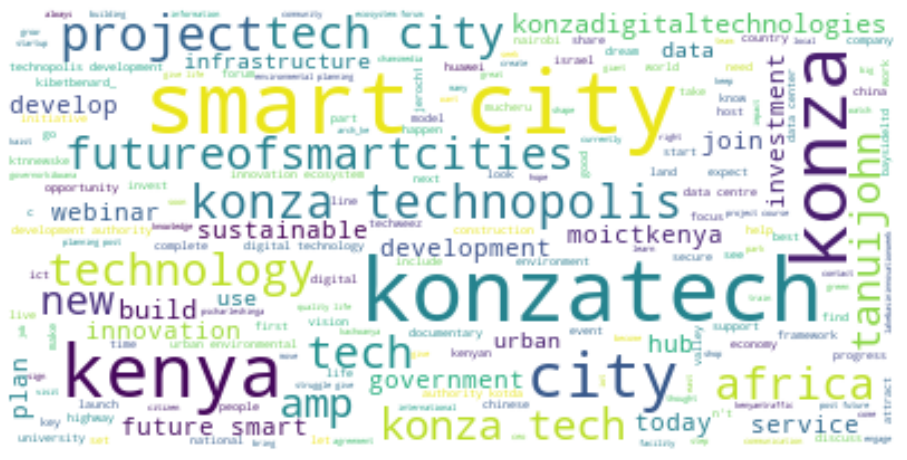

Eko Atlantic
--------------------
Anger: 235
Anticipation: 1077
Disgust: 190
Fear: 400
Joy: 695
Sadness: 270
Surprise: 292
Trust: 1068
Positive    729
Neutral     286
Negative    195
Name: sentiment, dtype: int64



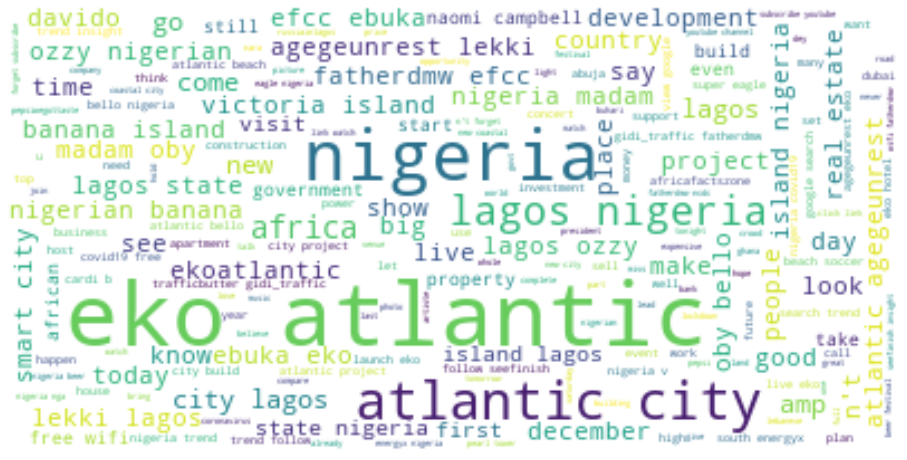

Waterfall City
--------------------
Anger: 10
Anticipation: 96
Disgust: 8
Fear: 15
Joy: 49
Sadness: 23
Surprise: 20
Trust: 75
Positive    60
Neutral     25
Negative     8
Name: sentiment, dtype: int64



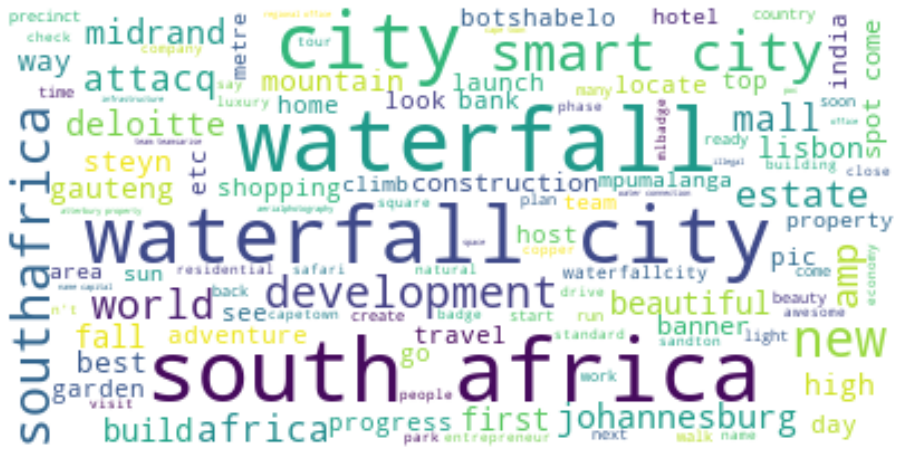

Hope city
--------------------
Anger: 25
Anticipation: 298
Disgust: 37
Fear: 29
Joy: 240
Sadness: 35
Surprise: 215
Trust: 281
Positive    145
Negative     22
Neutral       3
Name: sentiment, dtype: int64



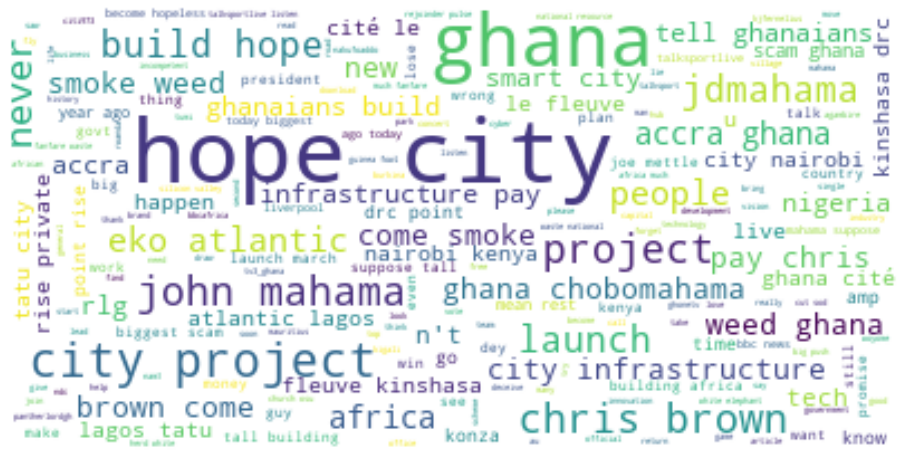

Vision city
--------------------
Anger: 40
Anticipation: 459
Disgust: 19
Fear: 26
Joy: 98
Sadness: 23
Surprise: 50
Trust: 133
Positive    270
Negative     22
Neutral      13
Name: sentiment, dtype: int64



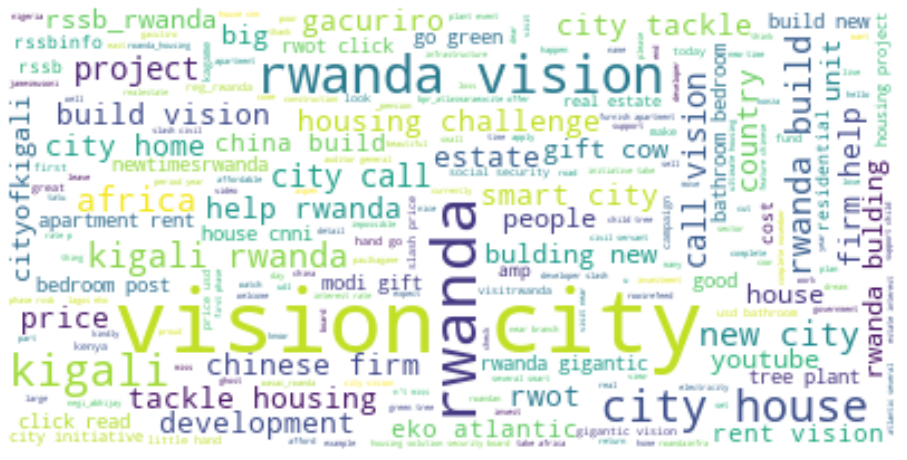

In [4]:
for project in search_df['project']:
    df_list = []
    for file in os.listdir('tweets'):
        if file.startswith(project) and file.endswith('_5.csv'):
            df_list.append(pd.read_csv(f'tweets/{file}'))
    super_df = pd.concat(df_list)
    sums = super_df.sum()
    print(project)
    print("-"*20)
    for emotion in emotions:
        print(f'{emotion}: {sums[emotion]}')
    print(super_df['sentiment'].value_counts())
    print()
    
    full_string = ""
    for words in super_df['edited']:
        full_string += f' {words}'
    full_string = full_string.replace("  ", " ")
    
    # Generate a word cloud image
    wordcloud = WordCloud(max_font_size=40, background_color="white").generate(full_string)

    # Display the generated image:
    plt.figure(figsize=(16, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()